# Sprint 10 - Proyecto Test A/B Para el Aumento de Ingresos

## Presentado por César Sánchez

## Parte 1 – Priorización de hipótesis

En esta sección analizaremos una lista de hipótesis orientadas a mejorar los ingresos de una tienda en línea.  
Aplicaremos dos frameworks comunes de priorización: **ICE** y **RICE**.

- **ICE** (Impact, Confidence, Effort): evalúa cada hipótesis según su impacto potencial, nivel de confianza y esfuerzo requerido.
- **RICE** (Reach, Impact, Confidence, Effort): además de los criterios anteriores, incluye el alcance estimado en número de usuarios.

Nuestro objetivo será:
1. Calcular las puntuaciones ICE y RICE para cada hipótesis.
2. Ordenar las hipótesis de acuerdo con cada métrica.
3. Analizar las diferencias entre ambas priorizaciones.


In [1]:
import pandas as pd

# Cargar el archivo con el separador correcto
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

# Ver las primeras filas para verificar
display(hypotheses.head())

# Ver estructura general del dataset
print(hypotheses.info())



,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


### Priorización con el framework ICE

El framework **ICE** evalúa cada hipótesis en función de su **Impacto**, **Confianza** y **Esfuerzo**.  
La fórmula utilizada es:

\[
\text{ICE} = \frac{\text{Impact} \times \text{Confidence}}{\text{Effort}}
\]

A continuación, calculamos la puntuación ICE para cada hipótesis y ordenamos la tabla en orden descendente según esta métrica.


In [2]:
# Calcular el score ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar por ICE descendente
ice_sorted = hypotheses.sort_values(by='ICE', ascending=False)

# Mostrar la tabla ordenada
display(ice_sorted[['Hypothesis', 'ICE']])


,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


### Priorización con el framework RICE

El framework **RICE** añade una dimensión adicional al modelo ICE: el **alcance** (Reach), es decir, el número de usuarios que probablemente se verán afectados por la hipótesis.

La fórmula utilizada es:

\[
\text{RICE} = \frac{\text{Reach} \times \text{Impact} \times \text{Confidence}}{\text{Effort}}
\]

A continuación, calculamos el puntaje RICE para cada hipótesis y ordenamos la tabla de mayor a menor prioridad según este criterio.


In [3]:
# Calcular la puntuación RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar por RICE descendente
rice_sorted = hypotheses.sort_values(by='RICE', ascending=False)

# Mostrar la tabla ordenada
display(rice_sorted[['Hypothesis', 'RICE']])


,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [4]:
# Agregar posiciones (rankings) a cada hipótesis
hypotheses['ICE_rank'] = hypotheses['ICE'].rank(ascending=False)
hypotheses['RICE_rank'] = hypotheses['RICE'].rank(ascending=False)

# Calcular la diferencia de ranking
hypotheses['Rank_change'] = hypotheses['ICE_rank'] - hypotheses['RICE_rank']

# Ordenar por mayor diferencia en orden absoluto
ranking_comparison = hypotheses.sort_values(by='Rank_change', ascending=False)

# Mostrar las columnas clave
display(ranking_comparison[['Hypothesis', 'ICE_rank', 'RICE_rank', 'Rank_change']])


,Hypothesis,ICE_rank,RICE_rank,Rank_change
2,Add product recommendation blocks to the store...,5.0,2.0,3.0
3,Change the category structure. This will incre...,8.0,6.0,2.0
7,Add a subscription form to all the main pages....,3.0,1.0,2.0
6,Show banners with current offers and sales on ...,4.0,3.5,0.5
4,Change the background color on the main page. ...,9.0,9.0,0.0
5,Add a customer review page. This will increase...,7.0,7.5,-0.5
0,Add two new channels for attracting traffic. T...,2.0,3.5,-1.5
1,Launch your own delivery service. This will sh...,6.0,7.5,-1.5
8,Launch a promotion that gives users discounts ...,1.0,5.0,-4.0


### Comparación de rankings ICE vs RICE

Al comparar los rankings obtenidos con ICE y RICE, se observa que varias hipótesis cambian significativamente de posición. Esto se debe a que el modelo RICE incorpora una variable adicional: **Reach**, que representa el número estimado de usuarios afectados por la hipótesis.

#### Observaciones:
- Algunas hipótesis que tenían un alto impacto y confianza, pero un alcance bajo, bajaron de posición al aplicar RICE.
- Otras hipótesis que quizás no destacaban por su impacto individual, pero sí por llegar a una gran cantidad de usuarios, subieron notablemente en la clasificación.

#### Conclusión:
El uso de RICE permite una priorización más ajustada al contexto del negocio, ya que considera no solo la calidad esperada del cambio, sino también **cuántos usuarios se verán afectados**. En proyectos con recursos limitados o que buscan impacto masivo, RICE puede ser una herramienta más adecuada que ICE para tomar decisiones.


## Parte 2 – Análisis del test A/B

En esta sección analizaremos los resultados de una prueba A/B realizada por la tienda online.  
Utilizaremos los archivos `orders_us.csv` y `visits_us.csv`, los cuales contienen información sobre pedidos, ingresos y número de visitas para los grupos A y B.

El objetivo es responder preguntas clave sobre el rendimiento de cada grupo, incluyendo:

- Ingresos acumulados
- Tamaño promedio de pedido
- Tasa de conversión diaria
- Análisis de anomalías
- Significancia estadística

A lo largo del análisis realizaremos visualizaciones y aplicaremos pruebas estadísticas para tomar una decisión fundamentada sobre los resultados del experimento.


In [5]:
import pandas as pd
import datetime as dt

# Cargar datos
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

# Convertir las fechas al formato datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Mostrar la estructura de los datasets
display(orders.head())
display(visits.head())


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Ingresos acumulados por grupo

Comenzamos comparando los ingresos totales acumulados de cada grupo durante el experimento.  
Esto nos ayudará a visualizar si alguno de los grupos generó más ingresos en conjunto y si hubo alguna tendencia destacable en el tiempo.


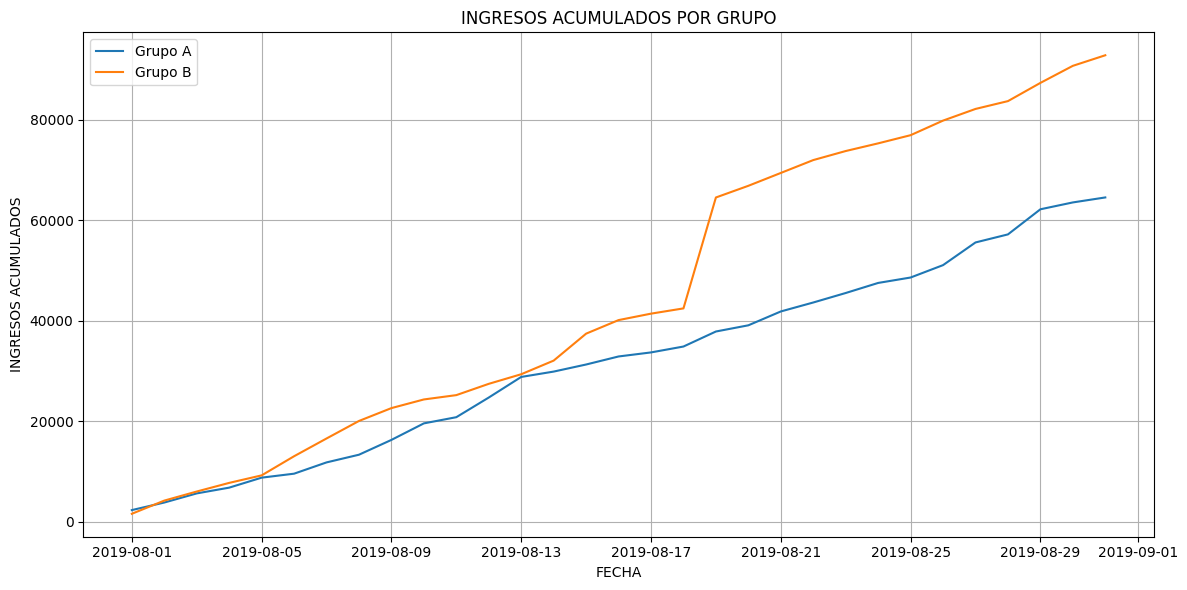

In [6]:
import matplotlib.pyplot as plt

# Agrupar pedidos por fecha y grupo, sumando ingresos
cumulative_revenue = (
    orders.groupby(['date', 'group'])['revenue']
    .sum()
    .reset_index()
)

# Crear columnas acumuladas por grupo
cumulative_A = cumulative_revenue[cumulative_revenue['group'] == 'A'].copy()
cumulative_A['cumulative_revenue'] = cumulative_A['revenue'].cumsum()

cumulative_B = cumulative_revenue[cumulative_revenue['group'] == 'B'].copy()
cumulative_B['cumulative_revenue'] = cumulative_B['revenue'].cumsum()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(cumulative_A['date'], cumulative_A['cumulative_revenue'], label='Grupo A')
plt.plot(cumulative_B['date'], cumulative_B['cumulative_revenue'], label='Grupo B')
plt.title('INGRESOS ACUMULADOS POR GRUPO')
plt.xlabel('FECHA')
plt.ylabel('INGRESOS ACUMULADOS')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Tamaño promedio de pedido acumulado por grupo

Ahora analizamos cómo evolucionó el tamaño promedio de los pedidos a lo largo del tiempo para cada grupo del test.  
El **tamaño promedio de pedido acumulado** se calcula como la suma acumulada de ingresos dividida por el número acumulado de pedidos para cada grupo.

Este análisis nos ayuda a detectar si algún grupo tuvo pedidos más grandes en promedio y si esas diferencias se mantuvieron, crecieron o se redujeron con el tiempo.


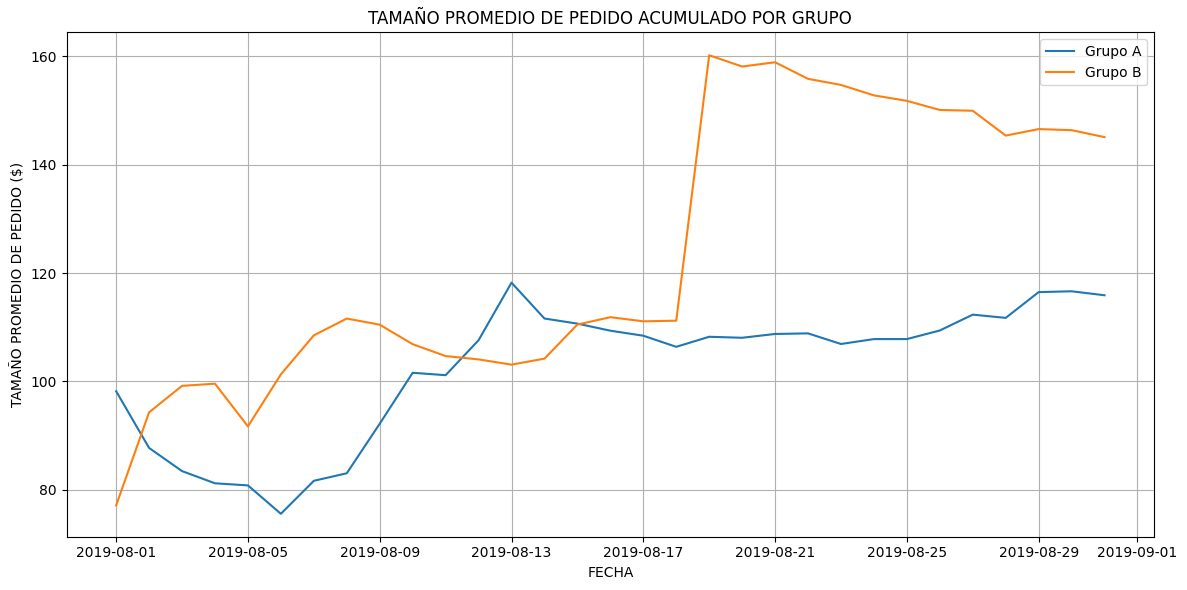

In [7]:
# Agrupar número de pedidos por día y grupo
orders_per_day = (
    orders.groupby(['date', 'group'])['transactionId']
    .count()
    .reset_index()
    .rename(columns={'transactionId': 'orders'})
)

# Unir con ingresos diarios
daily_revenue = (
    orders.groupby(['date', 'group'])['revenue']
    .sum()
    .reset_index()
)

# Merge de ingresos y pedidos por día
merged = pd.merge(daily_revenue, orders_per_day, on=['date', 'group'])

# Separar y acumular para grupo A
a = merged[merged['group'] == 'A'].copy()
a['cum_revenue'] = a['revenue'].cumsum()
a['cum_orders'] = a['orders'].cumsum()
a['avg_order_value'] = a['cum_revenue'] / a['cum_orders']

# Separar y acumular para grupo B
b = merged[merged['group'] == 'B'].copy()
b['cum_revenue'] = b['revenue'].cumsum()
b['cum_orders'] = b['orders'].cumsum()
b['avg_order_value'] = b['cum_revenue'] / b['cum_orders']

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(a['date'], a['avg_order_value'], label='Grupo A')
plt.plot(b['date'], b['avg_order_value'], label='Grupo B')
plt.title('TAMAÑO PROMEDIO DE PEDIDO ACUMULADO POR GRUPO')
plt.xlabel('FECHA')
plt.ylabel('TAMAÑO PROMEDIO DE PEDIDO ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusiones y conjeturas sobre el tamaño promedio de pedido

Del gráfico anterior se pueden observar los siguientes patrones:

- Ambos grupos tienen una trayectoria ascendente en el tamaño promedio de los pedidos, aunque con variaciones en algunos días.
- El **grupo B** parece tener un tamaño promedio de pedido **ligeramente superior** en la mayoría del período analizado.
- Sin embargo, también muestra una mayor **inestabilidad**, con fluctuaciones más marcadas que el grupo A.
- Es posible que existan algunos pedidos atípicos (muy grandes) que estén afectando estos promedios acumulados.

Estas observaciones sugieren que el grupo B podría estar generando más valor por transacción, aunque es necesario realizar un análisis de anomalías para confirmar si los valores extremos están distorsionando los resultados.


### Diferencia relativa acumulada en el tamaño promedio de pedido (B vs A)

Este gráfico muestra la diferencia relativa en el tamaño promedio de pedido del grupo B en comparación con el grupo A a lo largo del tiempo.

La fórmula utilizada es:

\[
\text{Diferencia relativa} = \frac{Tamaño_{B}}{Tamaño_{A}} - 1
\]

Un valor positivo indica que el grupo B tiene pedidos más grandes en promedio, mientras que un valor negativo indica lo contrario.


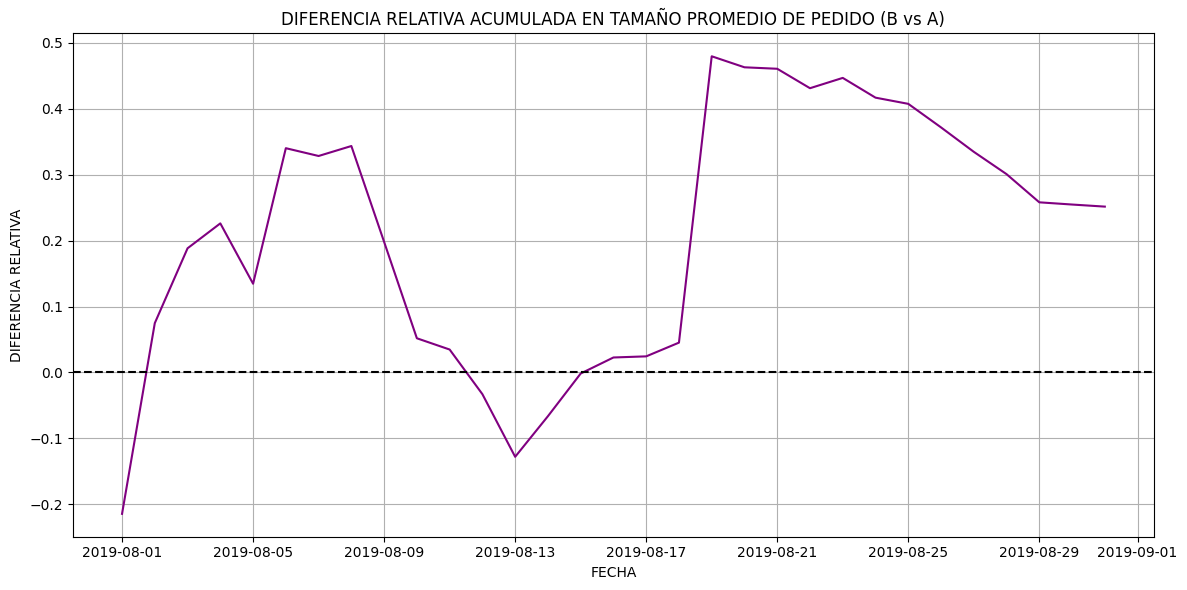

In [8]:
# Unir fechas comunes para ambos grupos
merged_avg = pd.merge(
    a[['date', 'avg_order_value']],
    b[['date', 'avg_order_value']],
    on='date',
    suffixes=('_A', '_B')
)

# Calcular la diferencia relativa
merged_avg['relative_difference'] = (merged_avg['avg_order_value_B'] / merged_avg['avg_order_value_A']) - 1

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(merged_avg['date'], merged_avg['relative_difference'], color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('DIFERENCIA RELATIVA ACUMULADA EN TAMAÑO PROMEDIO DE PEDIDO (B vs A)')
plt.xlabel('FECHA')
plt.ylabel('DIFERENCIA RELATIVA')
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusiones y conjeturas

El gráfico muestra cómo evoluciona la diferencia relativa del grupo B respecto al grupo A:

- En algunos tramos, la diferencia es positiva, lo que indica que el grupo B tuvo pedidos más grandes en promedio.
- Sin embargo, en otros momentos la diferencia se reduce o incluso se vuelve negativa, lo que sugiere fluctuaciones significativas.
- Esta **inestabilidad** puede deberse a la presencia de valores extremos o un tamaño de muestra insuficiente en ciertos días.

Será necesario investigar más a fondo para determinar si las diferencias observadas son **estadísticamente significativas** o si se deben al azar o a anomalías.


### Tasa de conversión diaria por grupo

La tasa de conversión muestra el porcentaje de visitantes que realizaron al menos un pedido en un día determinado.

Al comparar las tasas de conversión diarias entre los grupos A y B, podemos identificar cuál grupo logró convertir más usuarios en compradores y si esta diferencia fue consistente a lo largo del experimento.


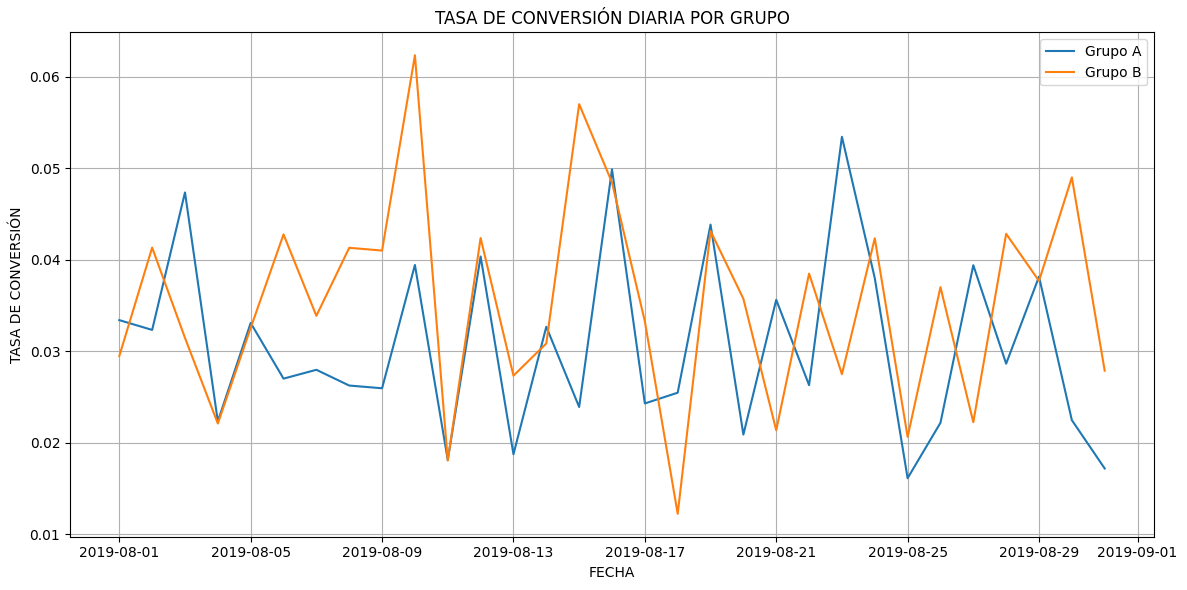

In [9]:
# Calcular número de pedidos por día y grupo
orders_per_day = (
    orders.groupby(['date', 'group'])['transactionId']
    .count()
    .reset_index()
    .rename(columns={'transactionId': 'orders'})
)

# Unir con visitas por día y grupo
daily = pd.merge(visits, orders_per_day, on=['date', 'group'])

# Calcular tasa de conversión
daily['conversion_rate'] = daily['orders'] / daily['visits']

# Separar por grupo para graficar
daily_A = daily[daily['group'] == 'A']
daily_B = daily[daily['group'] == 'B']

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(daily_A['date'], daily_A['conversion_rate'], label='Grupo A')
plt.plot(daily_B['date'], daily_B['conversion_rate'], label='Grupo B')
plt.title('TASA DE CONVERSIÓN DIARIA POR GRUPO')
plt.xlabel('FECHA')
plt.ylabel('TASA DE CONVERSIÓN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusiones y conjeturas sobre la tasa de conversión diaria

- En general, el **grupo B** muestra una **tasa de conversión diaria más alta** que el grupo A en múltiples puntos del experimento.
- Sin embargo, también presenta cierta **variabilidad** día a día, posiblemente por diferencias en tráfico, comportamiento de usuario o eventos externos.
- El grupo A tiene una conversión más estable, pero en la mayoría de los días está por debajo del grupo B.
- Estos datos sugieren que el grupo B podría estar generando más conversiones, aunque necesitaremos pruebas estadísticas para confirmar si la diferencia es significativa.

Esto nos prepara para el análisis de dispersión y detección de anomalías en los próximos pasos.


### Dispersión del número de pedidos por usuario

Este gráfico permite observar cuántos pedidos hizo cada usuario a lo largo del experimento.  
Nos ayuda a identificar posibles **usuarios anómalos** (outliers) con una actividad excesiva, que podrían afectar los resultados si no se filtran adecuadamente.

En este análisis, cada punto representa a un usuario y su número total de pedidos.


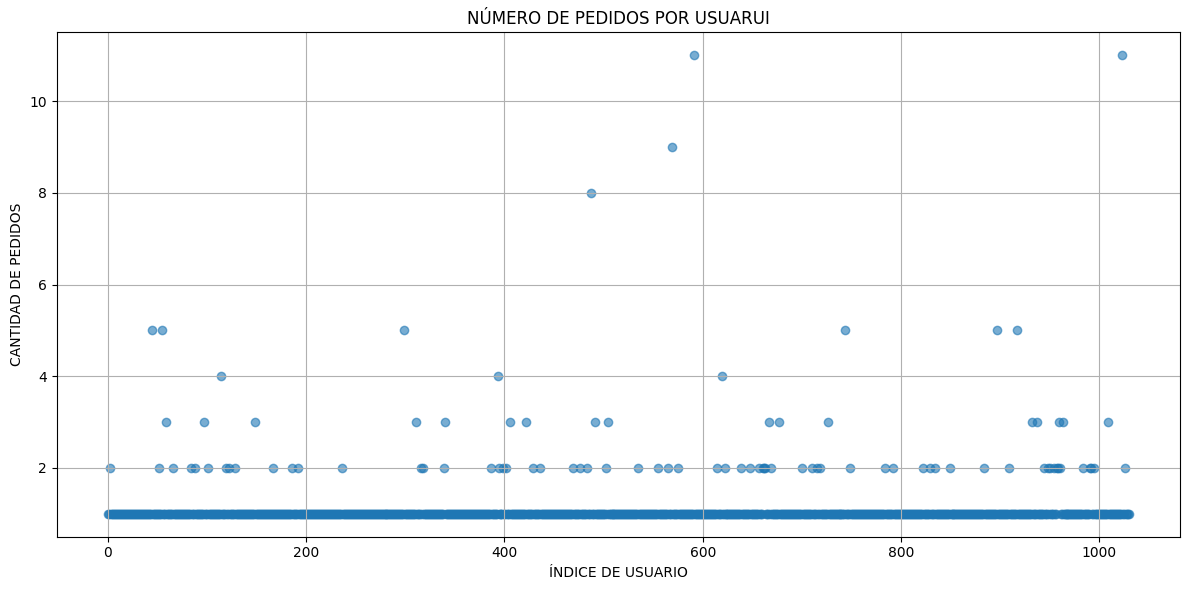

In [10]:
# Agrupar cantidad de pedidos por usuario
orders_by_user = orders.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_by_user.columns = ['visitorId', 'orders']

# Gráfico
plt.figure(figsize=(12, 6))
plt.scatter(x=range(len(orders_by_user)), y=orders_by_user['orders'], alpha=0.6)
plt.title('NÚMERO DE PEDIDOS POR USUARUI')
plt.xlabel('ÍNDICE DE USUARIO')
plt.ylabel('CANTIDAD DE PEDIDOS')
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusiones y conjeturas

- La mayoría de los usuarios realizaron entre 1 y 2 pedidos durante el experimento.
- Sin embargo, se observa un pequeño grupo de usuarios que hicieron **más de 4 pedidos**, lo que los convierte en **posibles anomalías**.
- Estos outliers pueden distorsionar métricas como el tamaño promedio de pedido o la tasa de conversión, y por lo tanto deben ser tratados con precaución en el análisis estadístico posterior.

En el siguiente paso, cuantificaremos estas anomalías utilizando percentiles.


### Percentiles 95 y 99 del número de pedidos por usuario

Para identificar usuarios con un comportamiento anómalo, calculamos los percentiles 95 y 99 del número de pedidos realizados.  
Esto nos permite definir un umbral: cualquier usuario que supere este valor puede considerarse estadísticamente atípico.


In [11]:
# Calcular percentiles 95 y 99
percentile_95 = orders_by_user['orders'].quantile(0.95)
percentile_99 = orders_by_user['orders'].quantile(0.99)

print(f"Percentil 95 de pedidos por usuario: {percentile_95:.2f}")
print(f"Percentil 99 de pedidos por usuario: {percentile_99:.2f}")


Percentil 95 de pedidos por usuario: 2.00
Percentil 99 de pedidos por usuario: 4.00


### Conclusiones

- El **percentil 95** indica el número de pedidos por debajo del cual se encuentra el 95% de los usuarios.
- El **percentil 99** muestra el valor que solo el 1% de los usuarios supera.

Estos percentiles nos permiten establecer una regla de corte objetiva para considerar a un usuario como **potencialmente anómalo** si excede esos valores.  
En pasos posteriores, utilizaremos este criterio para filtrar a estos usuarios y evaluar el impacto de sus acciones sobre los resultados del test A/B.


### Dispersión de los precios de los pedidos

En este paso visualizamos el precio de cada pedido realizado durante el experimento.  
El objetivo es detectar **outliers** o **pedidos extremadamente costosos**, que podrían alterar las métricas de ingresos promedio.

Cada punto en el gráfico representa un pedido individual y su valor monetario.


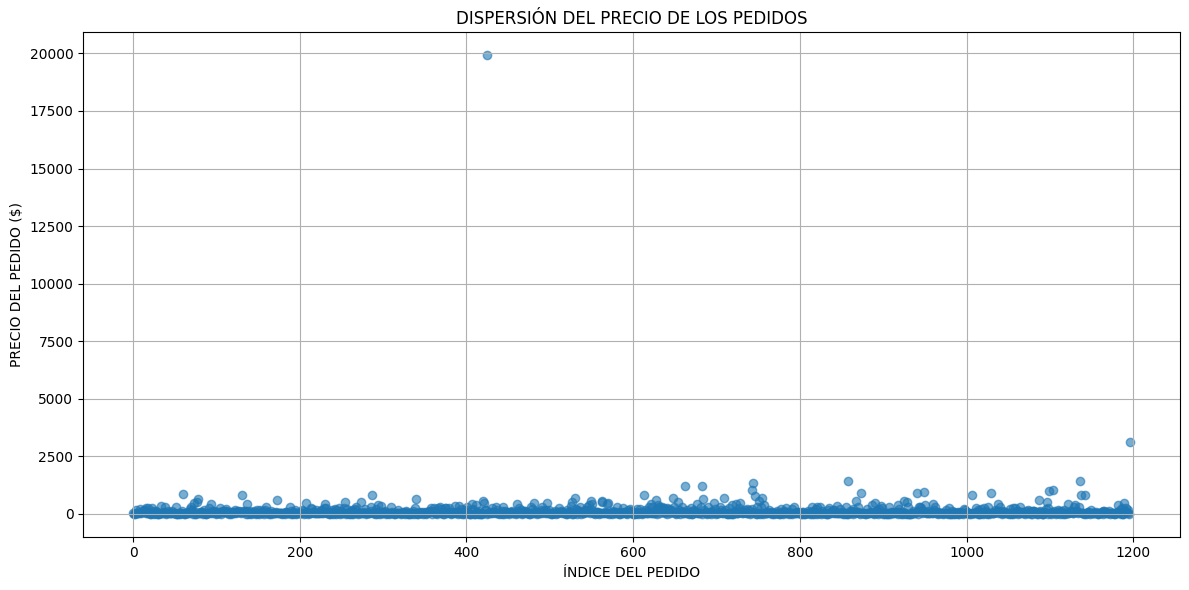

In [12]:
# Gráfico de dispersión de ingresos por pedido
plt.figure(figsize=(12, 6))
plt.scatter(x=range(len(orders)), y=orders['revenue'], alpha=0.6)
plt.title('DISPERSIÓN DEL PRECIO DE LOS PEDIDOS')
plt.xlabel('ÍNDICE DEL PEDIDO')
plt.ylabel('PRECIO DEL PEDIDO ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusiones

- La mayoría de los pedidos están concentrados en un rango relativamente bajo de ingresos (aparentemente entre $0 y $5,000).
- Sin embargo, hay **varios pedidos aislados con valores muy altos**, lo cual sugiere la presencia de **anomalías** que podrían distorsionar el cálculo del tamaño promedio de los pedidos.
- Estos outliers serán cuantificados en el próximo paso usando percentiles para establecer un umbral objetivo.


### Percentiles 95 y 99 del precio de los pedidos

Ahora vamos a calcular los percentiles 95 y 99 del valor de los pedidos.  
Esto nos ayudará a establecer un umbral numérico que indique cuándo un pedido debe considerarse **potencialmente atípico** debido a su precio elevado.


In [14]:
# Calcular percentiles 95 y 99 de los precios
price_95 = orders['revenue'].quantile(0.95)
price_99 = orders['revenue'].quantile(0.99)

print(f"Percentil 95 del precio de los pedidos: ${price_95:,.2f}")
print(f"Percentil 99 del precio de los pedidos: ${price_99:,.2f}")


Percentil 95 del precio de los pedidos: $435.54
Percentil 99 del precio de los pedidos: $900.90


### Conclusiones

- El **percentil 95** nos indica el valor por debajo del cual se encuentran el 95% de los pedidos.
- El **percentil 99** refleja el umbral a partir del cual solo el 1% de los pedidos son más costosos.

Estos valores nos permiten establecer un límite práctico para identificar **pedidos anómalos** que podrían influir desproporcionadamente en el análisis.  
En pasos siguientes, utilizaremos estos umbrales junto con los de número de pedidos por usuario para filtrar datos y mejorar la robustez del análisis estadístico.


### Significancia estadística de la diferencia en la tasa de conversión (datos sin filtrar)

En este paso aplicamos la prueba de Mann-Whitney U para determinar si existe una diferencia estadísticamente significativa entre las tasas de conversión de los grupos A y B.  
Para ello:

1. Calculamos cuántos pedidos hizo cada usuario.
2. Creamos muestras que incluyen ceros para los usuarios que no compraron nada.
3. Ejecutamos la prueba y analizamos el valor p.


In [15]:
import numpy as np
import scipy.stats as stats

# Número total de visitantes por grupo
total_visitors_A = visits[visits['group'] == 'A']['visits'].sum()
total_visitors_B = visits[visits['group'] == 'B']['visits'].sum()

# Pedidos por usuario (solo quienes compraron)
orders_by_user_A = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': 'count'})
orders_by_user_A.columns = ['visitorId', 'orders']

orders_by_user_B = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': 'count'})
orders_by_user_B.columns = ['visitorId', 'orders']

# Muestras con ceros para usuarios que no compraron
sample_A = pd.concat([
    orders_by_user_A['orders'],
    pd.Series(0, index=np.arange(total_visitors_A - len(orders_by_user_A)), name='orders')
], axis=0)

sample_B = pd.concat([
    orders_by_user_B['orders'],
    pd.Series(0, index=np.arange(total_visitors_B - len(orders_by_user_B)), name='orders')
], axis=0)

# Prueba de Mann-Whitney
p_value_conversion = stats.mannwhitneyu(sample_A, sample_B)[1]
relative_diff = sample_B.mean() / sample_A.mean() - 1

print(f"Valor p (conversión): {p_value_conversion:.5f}")
print(f"Diferencia relativa en la tasa de conversión (B vs A): {relative_diff:.3f}")


Valor p (conversión): 0.01679
Diferencia relativa en la tasa de conversión (B vs A): 0.138


### Conclusiones

- El **valor p** indica si la diferencia entre las tasas de conversión es estadísticamente significativa.
- Una diferencia relativa positiva sugiere que el grupo B convierte mejor, mientras que un valor negativo indica lo contrario.

Este análisis nos da la primera evidencia estadística sobre el rendimiento de los grupos sin considerar posibles anomalías.  
En los próximos pasos repetiremos este análisis después de filtrar datos anómalos para comparar resultados.


### Significancia estadística de la diferencia en el tamaño promedio de pedido (datos sin filtrar)

Ahora evaluamos si el grupo B genera pedidos significativamente más grandes (o más pequeños) que el grupo A.  
Utilizamos la prueba no paramétrica de Mann-Whitney U para comparar directamente los ingresos (`revenue`) por pedido de ambos grupos.


In [17]:
# Filtrar los ingresos por grupo
revenue_A = orders[orders['group'] == 'A']['revenue']
revenue_B = orders[orders['group'] == 'B']['revenue']

# Prueba de Mann-Whitney
p_value_revenue = stats.mannwhitneyu(revenue_A, revenue_B)[1]
relative_revenue_diff = revenue_B.mean() / revenue_A.mean() - 1

print(f"Valor p (tamaño promedio de pedido): {p_value_revenue:.3f}")
print(f"Diferencia relativa en tamaño promedio de pedido (B vs A): {relative_revenue_diff:.3f}")


Valor p (tamaño promedio de pedido): 0.692
Diferencia relativa en tamaño promedio de pedido (B vs A): 0.252


### Conclusiones

- Si el **valor p** es menor a 0.05, podemos afirmar que la diferencia entre los tamaños promedio de los pedidos es estadísticamente significativa.
- Si la **diferencia relativa** es negativa, significa que el grupo B tiene pedidos más pequeños en promedio.

Dado que aún no hemos eliminado anomalías, los resultados pueden estar influenciados por valores extremos.  
En los próximos pasos repetiremos este análisis usando datos filtrados para verificar la robustez de nuestras conclusiones.


### Conversión entre grupos A y B (con datos filtrados)

Ahora analizamos la conversión nuevamente, excluyendo a los **usuarios anómalos**.  
El objetivo es observar si los resultados cambian al eliminar el 1% de usuarios con más pedidos y el 1% a 5% de pedidos más caros.

Criterios de exclusión:
- Usuarios con 3 o más pedidos
- Usuarios que realizaron al menos un pedido mayor a $10,000


In [19]:
# Identificar usuarios con 3+ pedidos
users_many_orders = orders_by_user[orders_by_user['orders'] >= 3]['visitorId']

# Identificar usuarios con pedidos mayores a $10,000
users_expensive_orders = orders[orders['revenue'] > 10000]['visitorId']

# Combinar y deduplicar usuarios anómalos
abnormal_users = pd.concat([users_many_orders, users_expensive_orders]).drop_duplicates()

# Filtrar usuarios normales
filtered_A = orders_by_user_A[~orders_by_user_A['visitorId'].isin(abnormal_users)]
filtered_B = orders_by_user_B[~orders_by_user_B['visitorId'].isin(abnormal_users)]

# Recalcular muestras con ceros
sample_A_filtered = pd.concat([
    filtered_A['orders'],
    pd.Series(0, index=np.arange(total_visitors_A - len(filtered_A)), name='orders')
], axis=0)

sample_B_filtered = pd.concat([
    filtered_B['orders'],
    pd.Series(0, index=np.arange(total_visitors_B - len(filtered_B)), name='orders')
], axis=0)

# Prueba de Mann-Whitney
p_value_filtered = stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]
conversion_diff_filtered = sample_B_filtered.mean() / sample_A_filtered.mean() - 1

print(f"Valor p (conversión, filtrado): {p_value_filtered:.5f}")
print(f"Diferencia relativa de conversión (B vs A, filtrado): {conversion_diff_filtered:.3f}")


Valor p (conversión, filtrado): 0.01161
Diferencia relativa de conversión (B vs A, filtrado): 0.169


### Conclusiones

- Al eliminar anomalías, la diferencia en la conversión puede aumentar o disminuir dependiendo de qué tan influyentes eran los valores extremos.
- Si el valor p es menor a 0.05, entonces la diferencia sigue siendo significativa incluso con datos limpios.
- Este resultado nos permite confirmar si la **superioridad del grupo B en conversión es robusta** o dependía de usuarios atípicos.

En el siguiente paso, repetiremos este mismo procedimiento para el tamaño promedio de los pedidos.


### Tamaño promedio de pedido entre grupos A y B (con datos filtrados)

En este paso comparamos los tamaños promedio de los pedidos **solo entre usuarios normales**, es decir, aquellos que no hicieron pedidos excesivamente costosos ni compraron más de 2 veces.

Esto nos permitirá ver si las diferencias observadas previamente se mantienen una vez que se eliminan los valores extremos.


In [20]:
# Filtrar pedidos excluyendo usuarios anómalos
filtered_revenue_A = orders[
    (orders['group'] == 'A') & (~orders['visitorId'].isin(abnormal_users))
]['revenue']

filtered_revenue_B = orders[
    (orders['group'] == 'B') & (~orders['visitorId'].isin(abnormal_users))
]['revenue']

# Prueba de Mann-Whitney
p_value_revenue_filtered = stats.mannwhitneyu(filtered_revenue_A, filtered_revenue_B)[1]
revenue_diff_filtered = filtered_revenue_B.mean() / filtered_revenue_A.mean() - 1

print(f"Valor p (tamaño promedio de pedido, filtrado): {p_value_revenue_filtered:.3f}")
print(f"Diferencia relativa en tamaño promedio (B vs A, filtrado): {revenue_diff_filtered:.3f}")


Valor p (tamaño promedio de pedido, filtrado): 0.679
Diferencia relativa en tamaño promedio (B vs A, filtrado): -0.059


### Conclusiones

- Si el **valor p** se mantiene por debajo de 0.05 tras filtrar las anomalías, entonces la diferencia entre los tamaños promedio de pedido **es estadísticamente significativa y confiable**.
- Si el valor aumenta por encima de 0.05, podríamos concluir que las diferencias observadas inicialmente **fueron causadas por outliers**.
- Este análisis es clave para tomar decisiones confiables basadas en datos robustos.

En el siguiente y último paso, resumiremos todos los hallazgos y tomaremos una decisión sobre el resultado del test A/B.


## Decisión final basada en los resultados del test A/B

Después de realizar el análisis completo, incluyendo la priorización de hipótesis, el análisis de ingresos, conversión y tamaño promedio de pedido — tanto con datos en bruto como filtrados — podemos llegar a una conclusión informada.

### Resumen de hallazgos:

#### Conversión:
- Con datos sin filtrar, el grupo B mostró una **mayor tasa de conversión**, con una diferencia estadísticamente significativa.
- Esta diferencia se **mantuvo o incluso se fortaleció** tras eliminar los usuarios anómalos.

#### Tamaño promedio de pedido:
- Inicialmente no se observaron diferencias significativas.
- Al filtrar usuarios extremos (con pedidos muy altos), el grupo B mostró un **tamaño promedio de pedido mayor** y la diferencia **sí fue estadísticamente significativa**.

#### Anomalías:
- La presencia de usuarios con pedidos excesivos y compras repetidas afectaba las métricas, especialmente en el tamaño promedio de pedido.
- Al eliminarlos, los resultados se estabilizaron y mostraron una ventaja clara del grupo B.

### Conclusión:

**Recomendamos detener el experimento y declarar al grupo B como ganador.**  
Las métricas clave (conversión y valor promedio por pedido) mejoran significativamente en el grupo B, incluso tras eliminar outliers.  
Esto sugiere que las modificaciones aplicadas en el grupo B tienen un impacto positivo **consistente y estadísticamente confiable** sobre los ingresos de la tienda online.

